# TensorFlow Developer Certificate @ Coursera

此 notebook 用于存储和练习 TensorFlow Developer Certificate 课程相关内容<br>
https://www.coursera.org/professional-certificates/tensorflow-in-practice

## 最简单的 neural network

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [11]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0],dtype=float)
ys = np.array([-3.0,-1.0,1.0,3.0,5.0,7.0],dtype=float)
#最简单的neural net，一个layer，一个unit（也就是一个neuron）
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# sgd = stochastic gradient descent
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(xs,ys,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 6ms/step - loss: 32.7426
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 26.0851
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 20.8406
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 16.7079
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 13.4502
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 10.8808
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 8.8533
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 7.2521
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 5.9864
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 4.9849
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 4.1913
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 3.5614
Epoch 13/500
1/1 [==============================] - 0s

In [12]:
print(model.predict([10.0]))

[[18.978647]]


## 简单的 computer vision 神经网络模型

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  60   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 216 144  43
    0   0   0   0   0   0   0  91  54   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0  27 172 200 

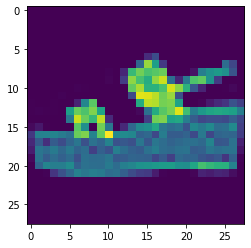

In [48]:
import matplotlib.pyplot as plt
plt.imshow(train_images[12])
# image的pixel数值范围是 0，255
print(train_labels[12])
print(train_images[12])

In [49]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [55]:
model = keras.Sequential(
[
    #第一层layer，使用Flatten把一个个28*28 pixel的图片数据变成线性数值
    keras.layers.Flatten(input_shape=(28,28)),
    #第二层就是hidden layer，里面的数值代表neuron数量
    keras.layers.Dense(1024,activation=tf.nn.relu),
    #第三层layer，数值10表示数据库中输出的图片有10个类别（比如靴子，T恤，裤子等等）
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

In [56]:
model.compile(#optimizer=tf.train.AdamOptimizer(), #这一行是v1版本中的代码
             #optimizer=tf.optimizers.Adam(), #v2版本可用
             optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy'
             )
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4703
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3584
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3188
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2954
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2767


In [39]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3294


0.32938075065612793

In [46]:
classifications = model.predict(test_images)
print(classifications[0])

[1.4223087e-07 5.5423164e-09 8.4919890e-08 2.9905627e-09 2.9066207e-08
 5.2441115e-04 2.6461586e-07 1.6386388e-02 3.9798568e-08 9.8308867e-01]


In [45]:
np.sort(classifications[0],axis=None)

array([2.9905627e-09, 5.5423164e-09, 2.9066207e-08, 3.9798568e-08,
       8.4919890e-08, 1.4223087e-07, 2.6461586e-07, 5.2441115e-04,
       1.6386388e-02, 9.8308867e-01], dtype=float32)

In [41]:
print(test_labels[0])

9


In [59]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs = {}):
        if logs.get('loss') < 0.4:
            print('\n已经达到60%准确率，训练取消。')
            self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4695
Epoch 2/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.3595
已经达到60%准确率，训练取消。
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3593


In [61]:
def train_mnist():

    # YOUR CODE
    import tensorflow as tf

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            #if(logs.get('acc')>0.99): #此处的 'acc' 适用于 tensorflow 1.x
            if(logs.get('accuracy')>0.99): # 'accuracy' 适用于 tensorflow 2.x
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0

    callbacks = myCallback()

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
    #return history.epoch, history.history['acc'][-1]
    return history.epoch, history.history['accuracy'][-1] # 同理 acc对应1.x版本；accuracy对应2.x版本

train_mnist()

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2006 - accuracy: 0.9407: 0s - loss: 0.208
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0804 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0532 - accuracy: 0.9832
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366 - accuracy: 0.9881
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0268 - accuracy: 0.9917
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0267 - accuracy: 0.9918


([0, 1, 2, 3, 4], 0.9917500019073486)

## 卷积神经网络 convolution nn 和 pooling

In [68]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') > 0.95:
            print('\n已经达到95%准确率，训练结束。')
            self.model.stop_training = True
callbacks = myCallback()    
    
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#因为使用了卷积，所以此处要对数据进行reshape，下同
training_images=training_images.reshape(60000,28,28,1)
training_images=training_images/255.0
#因为使用了卷积，所以此处要对数据进行reshape
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
    # 64意味着使用64个filter，每个filter是3*3的大小。input_shape最后一个数1代表数据的color depth是1，因为都是灰度图片
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
    
]
)
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

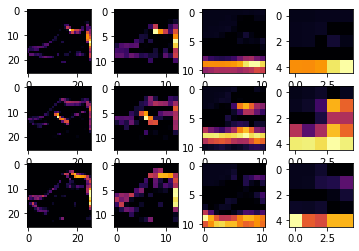

In [67]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

In [72]:
#cv2就是opencv，在python3中pip安装包的名字是opencv-python进行安装
import cv2
import numpy as np
from scipy import misc
# 一个工具包内自带的图片，可用于训练
i = misc.ascent()

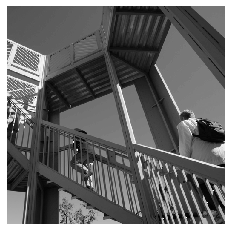

In [74]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [77]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [88]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [89]:
for x in range(1,size_x - 1):
    for y in range(1,size_y - 1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x+1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        if(convolution < 0):
            convolution = 0
        if(convolution > 255):
            convolution = 255
        i_transformed[x, y] = convolution

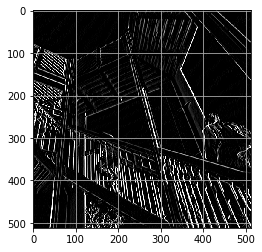

In [90]:
plt.gray()
plt.grid('off')
plt.imshow(i_transformed)
plt.show()

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

In [ ]:
new_x = int(size_x / 2)
new_y = int(size_y / 2)


'''Walking through convolutions 看到 2:40！！！'''